In [163]:
Objective
The primary goal of this project is to analyze the sales data of a pizza business to identify key insights and trends, which can guide decision-making. Specifically, it involves:

1.Understanding overall sales performance.
2.Identifying trends in monthly, hourly, and weekday sales.
3.Exploring sales distribution across different pizza categories, sizes, and names.
4.Determining the best and least-performing pizzas in terms of revenue.
5.Providing insights into customer preferences, peak sales times, and average order values.


In [163]:
import pandas as pd
import matplotlib.pyplot as plt


In [165]:
import seaborn as sns

In [167]:
sns.set(color_codes=True)

In [169]:
# This prints the current working directory
import os
print(os.getcwd()) 



C:\Users\tanu2


In [171]:
df = pd.read_csv('Please.csv')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_details_id    48620 non-null  int64  
 1   order_id            48620 non-null  int64  
 2   pizza_id            48620 non-null  object 
 3   quantity            48620 non-null  int64  
 4   order_date          48620 non-null  object 
 5   month               48620 non-null  object 
 6   order_time          48620 non-null  object 
 7   unit_price          48620 non-null  float64
 8   total_price         48620 non-null  float64
 9   pizza_size          48620 non-null  object 
 10  pizza_category      48620 non-null  object 
 11  pizza_ingredients   48620 non-null  object 
 12  pizza_name          48620 non-null  object 
 13  Proper_time         48620 non-null  object 
 14  order by week days  48620 non-null  object 
 15  total Revenue       48620 non-null  float64
dtypes: f

In [175]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,month,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Proper_time,order by week days,total Revenue
0,1,1,hawaiian_m,1,01-01-2015,Jan,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,11:00 AM,Thursday,13.25
1,2,2,classic_dlx_m,1,01-01-2015,Jan,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,11:00 AM,Thursday,16.00
2,3,2,five_cheese_l,1,01-01-2015,Jan,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,11:00 AM,Thursday,18.50
3,4,2,ital_supr_l,1,01-01-2015,Jan,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,11:00 AM,Thursday,20.75
4,5,2,mexicana_m,1,01-01-2015,Jan,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,11:00 AM,Thursday,16.00


In [177]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'month', 'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'Proper_time',
       'order by week days', 'total Revenue'],
      dtype='object')

In [179]:

# Exclude 'order_date' column and check for null values in other columns
null_counts_excluding_order_date = df.drop(columns=['order_date']).isnull().sum()

# Print null counts for all columns except 'order_date'
print(null_counts_excluding_order_date)

# Check if any column (excluding 'order_date') has null values
print("Does the DataFrame have null values (excluding 'order_date')?", 
      df.drop(columns=['order_date']).isnull().values.any())





order_details_id      0
order_id              0
pizza_id              0
quantity              0
month                 0
order_time            0
unit_price            0
total_price           0
pizza_size            0
pizza_category        0
pizza_ingredients     0
pizza_name            0
Proper_time           0
order by week days    0
total Revenue         0
dtype: int64
Does the DataFrame have null values (excluding 'order_date')? False


In [181]:
df['pizza_size'] = df['pizza_size'].str.strip().str.lower()  # Remove spaces and convert to lowercase
df['pizza_category'] = df['pizza_category'].str.strip().str.title()  # Remove spaces and convert to title case


In [183]:

df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['total Revenue'] = pd.to_numeric(df['total Revenue'], errors='coerce')



In [185]:
last_five_rows = df.tail(5)

# Print last 5 rows
print(last_five_rows)


       order_details_id  order_id       pizza_id  quantity  order_date month  \
48615             48616     21348  ckn_alfredo_m         1  31-12-2015   Dec   
48616             48617     21348  four_cheese_l         1  31-12-2015   Dec   
48617             48618     21348   napolitana_s         1  31-12-2015   Dec   
48618             48619     21349     mexicana_l         1  31-12-2015   Dec   
48619             48620     21350      bbq_ckn_s         1  31-12-2015   Dec   

      order_time  unit_price  total_price pizza_size pizza_category  \
48615   21:23:10       16.75        16.75          m        Chicken   
48616   21:23:10       17.95        17.95          l         Veggie   
48617   21:23:10       12.00        12.00          s        Classic   
48618   22:09:54       20.25        20.25          l         Veggie   
48619   23:02:05       12.75        12.75          s        Chicken   

                                       pizza_ingredients  \
48615  Chicken, Red Onions, Red 

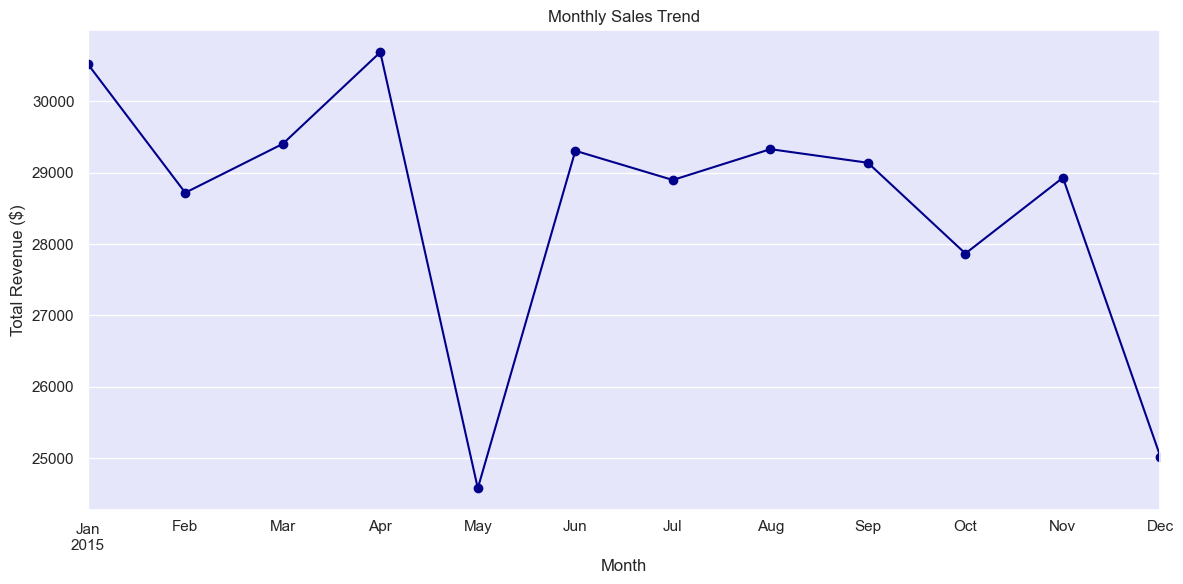

In [187]:
# Ensure 'order_date' is in datetime format and extract monthly sales
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['total Revenue'].sum()

# Plotting the monthly sales trend
plt.figure(figsize=(12, 6))
ax = monthly_sales.plot(kind='line', marker='o', color='Darkblue', title="Monthly Sales Trend")
ax.set_facecolor('#E6E6FA')  # Light blue background
ax.set_ylabel('Total Revenue ($)')
ax.set_xlabel('Month')
ax.grid(True)
plt.tight_layout()
plt.show()





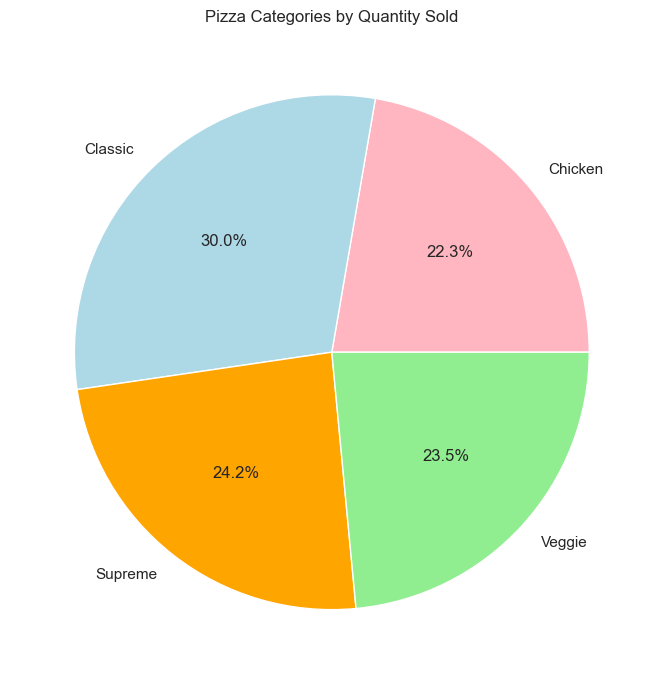

In [209]:
category_sales = df.groupby('pizza_category')['quantity'].sum()
category_sales.plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', 
                    colors=['#FFB6C1', '#ADD8E6', '#FFA500', '#90EE90'], title="Pizza Categories by Quantity Sold")
plt.gca().set_facecolor('#F5F5DC')  # Light beige background
plt.ylabel('')  # Remove the ylabel
plt.tight_layout(); plt.show()


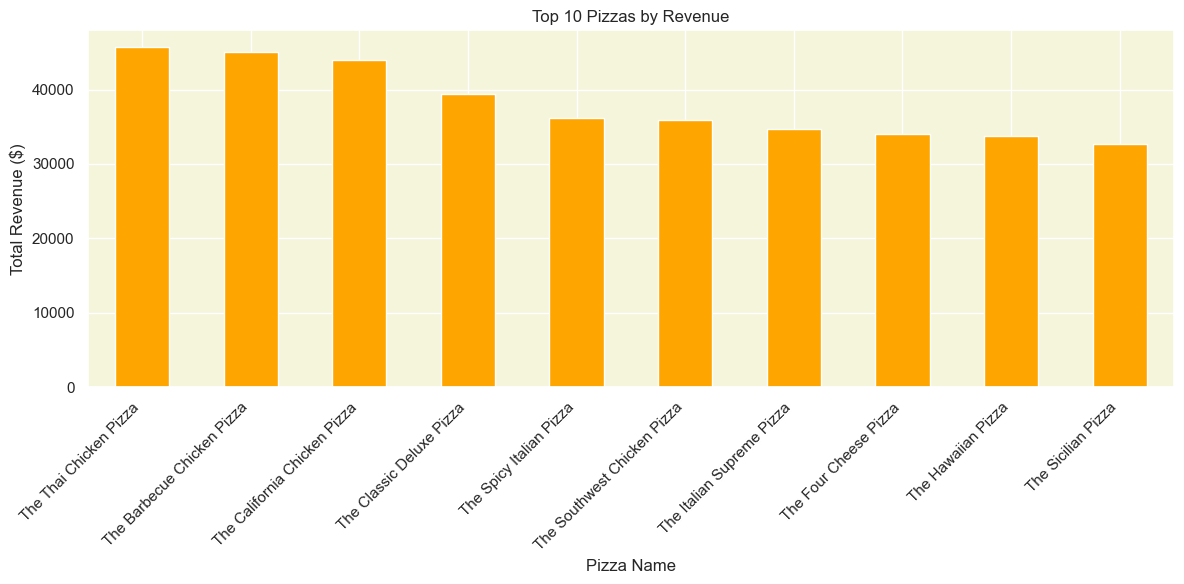

In [190]:
# Group by pizza name and sum revenue
pizza_revenue = df.groupby('pizza_name')['total Revenue'].sum().sort_values(ascending=False).head(10)

# Plot
pizza_revenue.plot(kind='bar', figsize=(12, 6), color='orange', title="Top 10 Pizzas by Revenue")
plt.ylabel('Total Revenue ($)')
plt.xlabel('Pizza Name')
plt.xticks(rotation=45, ha='right')

# Set background color
plt.gca().set_facecolor('#F5F5DC')  # Light gray background

plt.tight_layout()
plt.show()



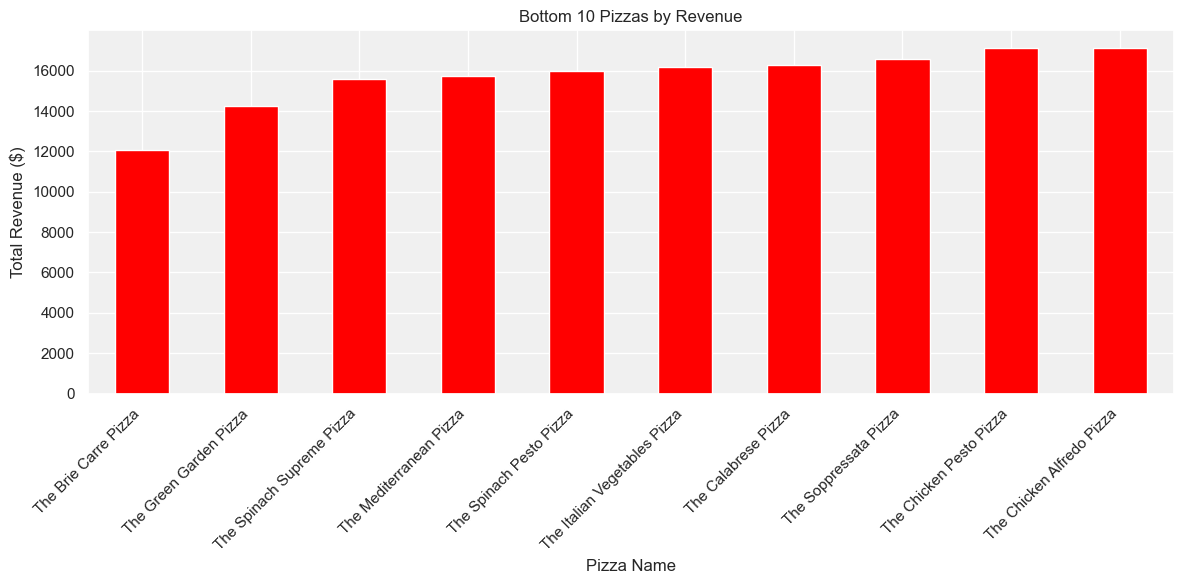

In [192]:
# Group by pizza name and sum revenue
pizza_revenue = df.groupby('pizza_name')['total Revenue'].sum().sort_values(ascending=True).head(10)

# Plot
pizza_revenue.plot(kind='bar', figsize=(12, 6), color='red', title="Bottom 10 Pizzas by Revenue")
plt.ylabel('Total Revenue ($)')
plt.xlabel('Pizza Name')
plt.xticks(rotation=45, ha='right')

# Set background color
plt.gca().set_facecolor('#f0f0f0')  # Light gray background

plt.tight_layout()
plt.show()



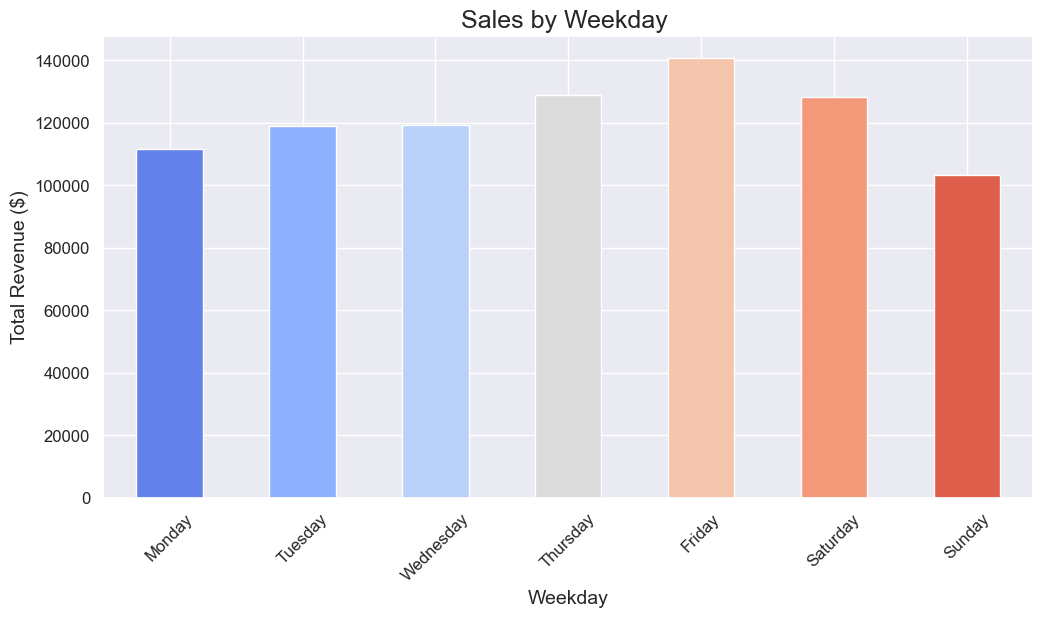

In [194]:
plt.figure(figsize=(12, 6))
weekday_sales.plot(kind='bar', stacked=True, color=sns.color_palette('coolwarm', len(weekday_sales)))

# Add title and labels
plt.title('Sales by Weekday ', fontsize=18)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

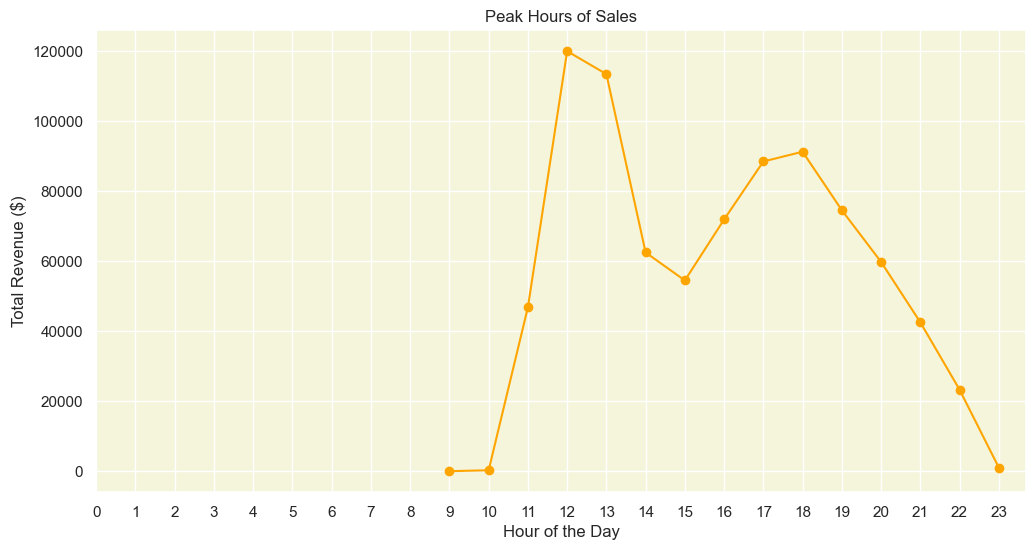

In [195]:
# Plot
plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='line', marker='o', color='#FFA500', title="Peak Hours of Sales")
plt.ylabel('Total Revenue ($)')
plt.xlabel('Hour of the Day')
plt.xticks(range(24))  # Ensures all hours from 0 to 23 are displayed
plt.gca().set_facecolor('#F5F5DC')
plt.grid(True)
plt.show()


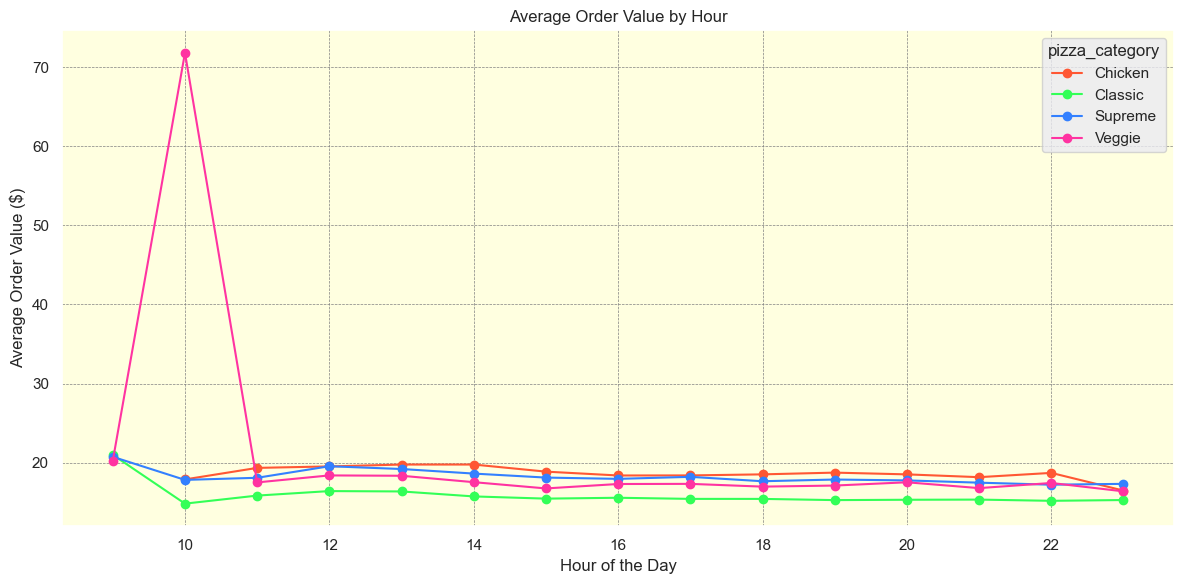

In [197]:
# Plot with light yellow background and custom colors
ax = aov_by_hour_category.plot(kind='line', marker='o', figsize=(12, 6), 
                                   color=['#FF5733', '#33FF57', '#3380FF', '#FF33A1'], title="Average Order Value by Hour")
ax.set_facecolor('#FFFFE0')
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_ylabel('Average Order Value ($)', fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5, color='grey')
plt.tight_layout()
plt.show()


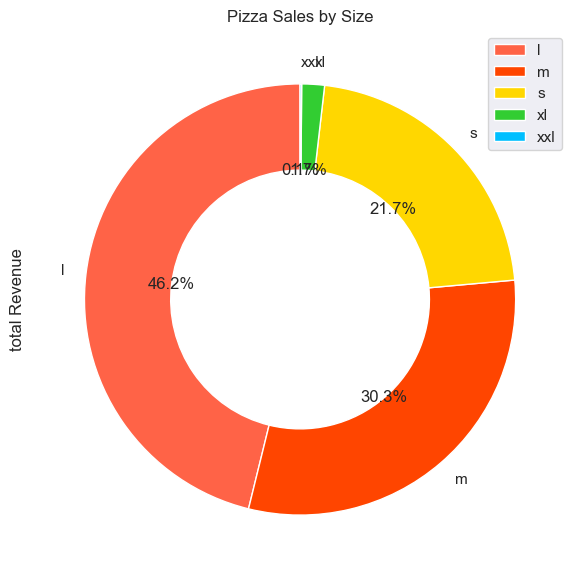

In [207]:
# Grouping and sorting sales data by pizza size
sales_by_size = df.groupby('pizza_size')['total Revenue'].sum().reset_index().sort_values('total Revenue', ascending=False)

# Plotting a donut chart with vibrant colors
sales_by_size.plot.pie(y='total Revenue', labels=sales_by_size['pizza_size'], autopct='%1.1f%%', startangle=90, 
                       colors=['#FF6347', '#FF4500', '#FFD700', '#32CD32', '#00BFFF', '#8A2BE2', '#FF1493'], 
                       wedgeprops={'width': 0.4}, figsize=(7,7), title='Pizza Sales by Size')

# Display the chart
plt.show()


In [ ]:
Conclusion

Monthly Sales Trend:

1.The monthly sales analysis highlights periods of peak and low sales, enabling the identification of seasonality in demand.
Pizza Categories:

2.The sales distribution by pizza category (e.g., Veggie, Classic, Supreme, Chicken) shows customer preferences, with some categories being significantly more popular than others.
Top 10 and Bottom 10 Pizzas:

3.The analysis of the most and least profitable pizzas reveals which pizzas are driving the most revenue and which are underperforming, providing opportunities to promote or reevaluate less popular items.
Sales by Size:

4.The sales breakdown by pizza size (e.g., Small, Medium, Large) shows customer preferences for different sizes and helps in optimizing inventory.
Sales by Weekday and Hour:

5.The weekday and hourly sales data highlight peak times for customer activity, helping to schedule staff and manage inventory efficiently.
Customer Spending Behavior:

6.Insights into the average order value (AOV) across different hours of the day suggest the best times to run promotional campaigns.
